# Homework set 4

Please **submit this Jupyter notebook through Canvas** no later than **Monday December 9, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. On canvas there are hints about creating a nice pdf version.**

Before you hand in, please make sure the notebook runs, by running "Restart kernel and run all cells..." from the Kernel menu.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Zoë Azra Blei 15762467
Costanza D'Ercole 15424596

Run the following cell to import NumPy, Matplotlib. If anything else is needed you can import this yourself.

In [4]:
import numpy as np
import matplotlib.pyplot as plt


# Exercise 1
N.B.1. you are to implement the methods yourself.

N.B.2. Tentative distribution of points is 2+1+2+2+2 points (plus 1 point makes 10).

Given a function $f$, let $T(f,a,b,m)$ denote the composite trapezoid rule with $m$ subintervals over the interval $[a,b]$. 

## (a)
Approximate the integral of $x^{-3}$ over $[a,b] = [ \frac{1}{10}, 100 ]$ by the composite trapezoid rule $T(f,a,b,m)$ for $m = 2^k$. Plot the absolute approximation error for different values of $k$. Find the smallest $k$ such that the exact error is less than $\epsilon = 10^{-3}$. Explain the slow convergence.

k=0, m=1, Approximation=49950.000050, Error=4.990000e+04
k=1, m=2, Approximation=24975.000423, Error=2.492500e+04
k=2, m=4, Approximation=12487.501855, Error=1.243750e+04
k=3, m=8, Approximation=6243.757494, Error=6.193758e+03
k=4, m=16, Approximation=3121.904490, Error=3.071905e+03
k=5, m=32, Approximation=1561.050738, Error=1.511051e+03
k=6, m=64, Approximation=780.886154, Error=7.308862e+02
k=7, m=128, Approximation=391.662953, Error=3.416630e+02
k=8, m=256, Approximation=199.419975, Error=1.494200e+02
k=9, m=512, Approximation=108.215472, Error=5.821552e+01
k=10, m=1024, Approximation=69.373823, Error=1.937387e+01
k=11, m=2048, Approximation=55.558404, Error=5.558454e+00
k=12, m=4096, Approximation=51.459191, Error=1.459241e+00
k=13, m=8192, Approximation=50.369918, Error=3.699681e-01
k=14, m=16384, Approximation=50.092781, Error=9.283133e-02
k=15, m=32768, Approximation=50.023179, Error=2.322933e-02
k=16, m=65536, Approximation=50.005759, Error=5.808681e-03
k=17, m=131072, Approxi

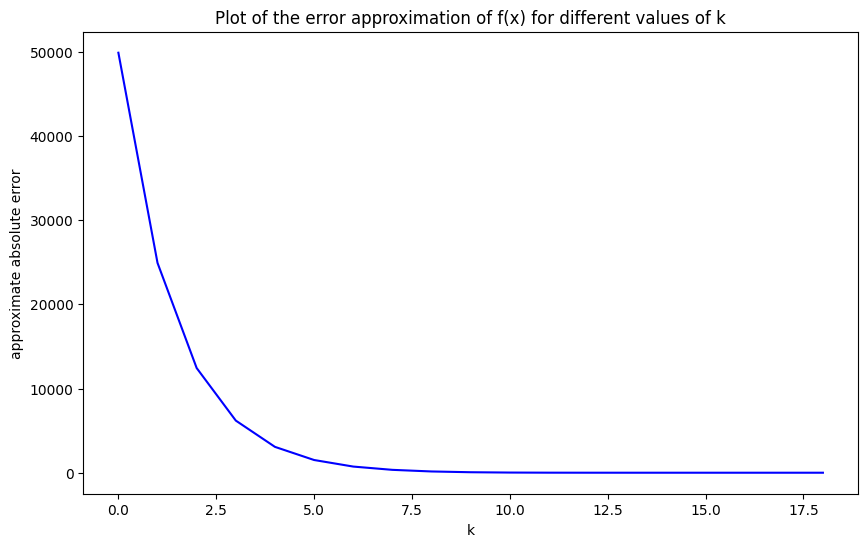

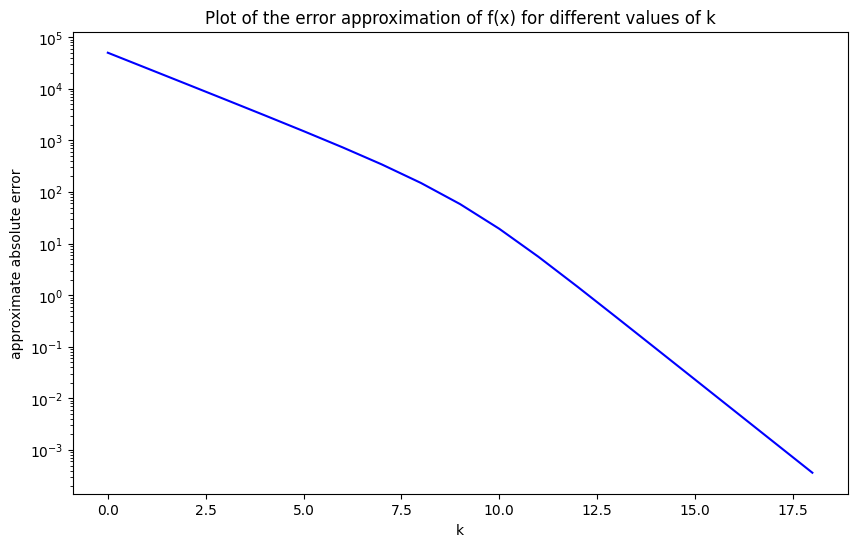

In [5]:
def f(x):
    return x**(-3)


def trapezoid(f, a, b, m):
    lngth_interv = (b - a) / m
    a0 = a
    area_sum = 0
    for _ in range(m):
        b0 = a0 + lngth_interv
        area = (lngth_interv * (f(a0) + f(b0)) / 2)
        area_sum += area
        a0 = b0
    return area_sum

# Analytical integral of x^(-3) over [1/10, 100]
def exact_integral(a, b):
    return (-(1 / (2 * b**2)) + (1 / (2 * a**2)))

# Main logic
a, b = 1/10, 100
exact_value = exact_integral(a, b)
epsilon = 1e-3  
k_max = 20  
errors = []
k_values = []

for k_value in range(k_max):
    m = 2**k_value
    area_approx = trapezoid(f, a, b, m)
    error = np.abs(area_approx - exact_value)
    errors.append(error)
    k_values.append(k_value)
    
    print(f"k={k_value}, m={m}, Approximation={area_approx:.6f}, Error={error:.6e}")
    if error < epsilon:
        print(f"Smallest k with error < {epsilon}: {k_value}")
        break

plt.figure(figsize=(10,6))
plt.plot(k_values,errors, label='',color='b')
plt.xlabel("k")
plt.ylabel("approximate absolute error")
plt.title("Plot of the error approximation of f(x) for different values of k")
plt.show()

plt.figure(figsize=(10,6))
plt.semilogy(k_values,errors, label='',color='b')
plt.xlabel("k")
plt.ylabel("approximate absolute error")
plt.title("Plot of the error approximation of f(x) for different values of k")
plt.show()


#### WRITE ANSWER HERE DONT FORGET!!!!!!!

## (b)

To improve the convergence rate of the above problem, we may use an adaptive strategy, as discussed in the book and the lecture. Consider the following formulas for approximate integration
$$I_1(f,a,b) = T(f,a,b,1)$$
$$I_2(f,a,b) = T(f,a,b,2).$$
Show, based on the precise error estimates for the trapezoid rule from the book/lecture that the error in $I_2$ can be estimated by a formula of the form 
$$E_2 = C (I_1 - I_2)$$
and determine the constant $C$ (if you can't find $C$, you may take $C = 0.5$).


We know that a general trapezoidal rule is defined as: $T(f,a,b)=\frac{b-a}{2}(f(a)+f(b))$. To analyze the error we can expand f(x) using the Taylor series, considering that $f(b)=f(a+h)$:
\begin{equation}
    f(b)=f(a)+hf'(a)+\frac{h^2}{2}f''(a)+\frac{h^3}{6}f'''(a)+O(h^4)
\end{equation}
Hence, the expression $f(a)+f(b)$ in the general formula T(f,a,b) can be rewritten as:
\begin{equation}
    f(a)+f(b)=f(a)+(f(a)+hf'(a)+\frac{h^2}{2}f''(a)+\frac{h^3}{6}f'''(a)+O(h^4))=2f(a)+hf'(a)+\frac{h^2}{2}f''(a)+\frac{h^3}{6}f'''(a)+O(h^4)
\end{equation}
Substituting, the trapezoid rule then becomes:
\begin{equation}
    T(f,a,b)=\frac{b-a}{2}(2f(a)+hf'(a)+\frac{h^2}{2}f''(a)+\frac{h^3}{6}f'''(a)+O(h^4))=h(f(a)+\frac{h}{2}f'(a)+\frac{h^2}{4}f''(a)+\frac{h^3}{12}f'''(a))+O(h^4)
\end{equation}

To compute the error, we need to compute the exact integral I by using the Taylor series:
\begin{equation}
    f(x)=f(a)+(x-a)f'(a)+\frac{(x-a)^2}{2}f''(a)+\frac{(x-a)^3}{6}f'''(a)+O((x-a)^4)
\end{equation}

The integral is then:
\begin{equation}
    \int_a^bf(x)dx=\int_a^b[f(a)+(x-a)f'(a)+\frac{(x-a)^2}{2}f''(a)+\frac{(x-a)^3}{6}f'''(a)]dx+O((x-a)^4)=hf(a)+\frac{h^2}{2}f'(a)+\frac{h^3}{6}f''(a)+\frac{h^4}{24}f'''(a)+O(h^5)
\end{equation}

The error is given by:
\begin{equation}
    E_T=I-T(f,a,b)=[hf(a)+\frac{h^2}{2}f'(a)+\frac{h^3}{6}f''(a)+\frac{h^4}{24}f'''(a)]-[h(f(a)+\frac{h}{2}f'(a)+\frac{h^2}{4}f''(a)+\frac{h^3}{12}f'''(a))]=-\frac{h^3}{12}f''(a)=-\frac{(b-a)^3}{12}f''(a)
\end{equation}

For $I_2$, the error is given by: $E_2=-\frac{(b-a)^3}{12\cdot 2^2}f''(a)=-\frac{(b-a)^3}{48}f''(a)$


## (c)
An adaptive strategy for computing the integral on an interval $[a,b]$ now is: Compute $I_2$ and $E_2$, and accept $I_2$ as an approximation when the estimated error $E_2$ is less or equal than a desired tolerance $\epsilon$.  Otherwise, apply the procedure to 
$\int_a^{\frac{b+a}{2}} f(x) \, dx$ and $\int_{\frac{b+a}{2}}^b f(x) \, dx$ with tolerances $\frac{\epsilon}{2}$.

Write a recursive python routine that implements the adaptive strategy.

Then apply this routine to the function $x^{-3}$ with $a, b, \epsilon$ as before. What is the exact error in the obtained approximation? 

In [ ]:
def adaptive(f, a, b, tol):
    # Compute I2 and E2
    I2 = trapezoid(f, a, b, 2)
    I1 = trapezoid(f, a, b, 1)
    E2 = np.abs(1/3 * (I1 - I2))  # Error estimate
    
    if E2 <= tol:  # If error is within tolerance, return result
        return I2
    else:
        # Split the interval into two halves and recursively compute
        mid = a + (b-a)/2
        left = adaptive(f, a, mid, tol / 2)
        right = adaptive(f, mid, b, tol / 2)
        return left + right

# Test the implementation
a, b = 1/10, 100     # Interval
tol = 1e-3           # Tolerance

approx = adaptive(f, a, b, tol)
print(f"The approximated integral value is: {approx}")
print(f"The exact error with the adaptive strategy is: {np.abs(exact_integral(a,b)-approx)}")


The approximated integral value is: 50.00014849011892
The exact error with the adaptive strategy is: 0.0001984901189260313


The error obtained by using the adaptive strategy is almost half the error obtained with the traditional Trapezoid method, as they are $2e^{-4}$ and $3.6e^{-4}$, respectively.

## (d)

Modify the code of (c) so that the number of function evaluations is counted. Optimize your implementation such that no unnecessary function evaluations are performed.

Compare the number of function evaluations used in the adaptive strategy of (c) with the result of (a). 
(*Hint*: To count the number of function evaluations, you may use a global variable.)


In [45]:
def trapezoid_modified(f, a, b, m):
    lngth_interv = (b - a) / m
    a0 = a
    area_sum = 0
    fx = []  # List to store function values

    for _ in range(m):
        b0 = a0 + lngth_interv
        f_a0 = f(a0)  # Evaluate f(a0)
        f_b0 = f(b0)  # Evaluate f(b0)
        
        fx.append(f_a0)  # Append f(a0) to the list
        fx.append(f_b0)  # Append f(b0) to the list
        
        area = (lngth_interv * (f_a0 + f_b0) / 2)
        area_sum += area
        a0 = b0

    fx_eval = len(fx)
    # Remove duplicate evaluations for shared points
    fx = list(dict.fromkeys(fx))  # Keeps unique function values in order

    return area_sum, fx, fx_eval


def adaptive_modified(f, a, b, tol, func_evals=0):
    """Adaptive integration with function evaluation counting."""
   
    # Compute I2 using trapezoidal rule
    I2, fx2, _ = trapezoid_modified(f, a, b, 2)
    func_evals += 3  # Three function evaluations for two subintervals
    
    # Compute I1 using trapezoidal rule
    I1, _, _ = trapezoid_modified(f, a, b, 1)
    func_evals += 2  # Two function evaluations for one interval
    
    # Estimate error
    E2 = abs(1 / 3 * (I1 - I2))
    
    if E2 <= tol:  # If error is within tolerance, return result
        return I2, func_evals
    else:
        # Split the interval into two halves and recursively compute
        mid = a + (b-a)/2
        left, func_evals = adaptive_modified(f, a, mid, tol / 2, func_evals)
        right, func_evals = adaptive_modified(f, mid, b, tol / 2, func_evals)
        return left + right, func_evals
    
# Test the implementation
iter = 0
a, b = 1/10, 100     # Interval
tol = 1e-3           # Tolerance

# Testing the adaptive method
approx, function_eval = adaptive_modified(f, a, b, tol, iter)
print(f"The approximated integral value with the adaptive method is: {approx}")
print(f"The exact error with the adaptive strategy is: {np.abs(exact_integral(a,b)-approx)}")
print(f"Function evaluations needed: {function_eval}")

# Testing the standard trapezoid method
m = 2**18
approx_standard, _,  function_eval_standard = trapezoid_modified(f, a, b, m)
print(f"The approximated integral value with the standard trapezoid rule is: {approx_standard}")
print(f"The exact error with the standard trapezoid rule is: {np.abs(exact_integral(a,b) - approx_standard)}")
print(f"Function evaluations needed: {function_eval_standard}")



The approximated integral value with the adaptive method is: 50.00014849011892
The exact error with the adaptive strategy is: 0.0001984901189260313
Function evaluations needed: 48345
The approximated integral value with the standard trapezoid rule is: 50.000313068890385
The exact error with the standard trapezoid rule is: 0.0003630688903939472
Function evaluations needed: 524288


As expected, by using the modified adaptive strategy the number of functions evaluations required are extremely lower compared to the standard trapezoid rule.\
As found, the number of function evaluations required are approximately 48.000 and 524.000, respectively.


## (e)
In the course of executing the recursive procedure, some subintervals are refined (split into two subintervals) while others aren't as a result of the choices made by the algorithm. It turns out that the choices made by this algorithm are not always optimal. Other algorithms, that decide in a different way which subinterval needs to be refined, may be more efficient in the sense that they require less function evaluations (while using the same formulas for the approximate integral and the approximate error associated with a subinterval).

Can you explain why this is the case? Devise an alternative, non-recursive algorithm that addresses this issue and should to lead a more efficient integral computation. Describe your approach and algorithm in about 5 to 10 sentences (bullet points).
